In [1]:
#Regression-based stacking ensemble method: 
#Predicting Patient's Length of Stay 

#This project predicts a patient's length of stay and discharge date based
#on his/her age, gender, the Service he/she is in, and the disease he/she
#has.

#We used 8 different models to find the one that best predicts our problem.
#These models are the following:
    ##Random Forest Regressor
    ##XGBoost
    ##Extra Trees Regressor 
    ##Decision Tree Regressor
    ##Deep Neural Network Regression
    ##Light GBM
    ##SVR
    ##Stacking Regressor
#We evaluated the model using (r2, Mean Absolute Error, Mean
#Squared Error and Root Mean Square Error (RMSE) as we are dealing with a regression problem. But also we used the
#accuracy to evaluate the performance.

#MAE 
##MAE is a performance/quality measure to evaluate the performance of your ML model, once finalized in a regression.
##In statistics, the mean absolute error (MAE) is a way to measure the accuracy of a given model.
##The mean absolute error (MAE) is found to be 0.17 for the Extra Trees Regressor model.
##This tells us that the average difference between the actual data value and the value predicted by the model is 0.17.
##The lower the MAE for a given model, the better the model is able to predict the actual values.
#r2_score
#The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y, regardless of the input characteristics, would get a
#r2 score of 0.0.
#MSE
##The mean square error (MSE) indicates how close a regression line is to a set of points. To do this, it takes the 
#distances between the points and the regression line (these distances are the "errors") and squares them. 
#Squaring is necessary to remove any negative signs. It also gives more weight to the larger differences. It is called the 
#root mean square error because you find the average of a set of errors. The lower the MSE, the better the forecast.

#RMSE
##The root mean square error (RMSE) is the standard deviation of the residuals (prediction errors). 
##The residuals are a measure of the distance of the data points from the regression line; RMSE is a measure of the 
##dispersion of these residuals. In other words, it indicates how concentrated the data are around the line of best fit.
##RMSE is commonly used in climatology, forecasting and regression analysis to verify experimental results.

In [2]:
"""
A brief overview of linear regression assumptions and the key visual tests
The assumptions
The four key assumptions that need to be tested for a linear regression 
model are,

1.Linearity: The expected value of the dependent variable is a linear 
function of each independent variable, holding the others fixed 
(note this does not restrict you to use a nonlinear transformation of the 
independent variables i.e. you can still model f(x) = ax² + bx + c,
using both x² and x as predicting variables.

2.Independence: The errors (residuals of the fitted model) are independent
of each other.

3.Homoscedasticity(constant variance):The variance of the errors is constant
with respect to the predicting variables or the response.

4.Normality: The errors are generated from a Normal distribution (of unknown
mean and variance, which can be estimated from the data). Note, this is not
a necessary condition to perform linear regression unlike the top three
above. However, without this assumption being satisfied, you cannot
calculate the so-called ‘confidence’ or ‘prediction’ intervals easily as
the well-known analytical expressions corresponding to Gaussian distribution
cannot be used.
For multiple linear regression, judging multicollinearity is also critical
from the statistical inference point of view. This assumption assumes 
minimal or no linear dependence between the predicting variables.

"""

'\nA brief overview of linear regression assumptions and the key visual tests\nThe assumptions\nThe four key assumptions that need to be tested for a linear regression \nmodel are,\n\n1.Linearity: The expected value of the dependent variable is a linear \nfunction of each independent variable, holding the others fixed \n(note this does not restrict you to use a nonlinear transformation of the \nindependent variables i.e. you can still model f(x) = ax² + bx + c,\nusing both x² and x as predicting variables.\n\n2.Independence: The errors (residuals of the fitted model) are independent\nof each other.\n\n3.Homoscedasticity(constant variance):The variance of the errors is constant\nwith respect to the predicting variables or the response.\n\n4.Normality: The errors are generated from a Normal distribution (of unknown\nmean and variance, which can be estimated from the data). Note, this is not\na necessary condition to perform linear regression unlike the top three\nabove. However, without 

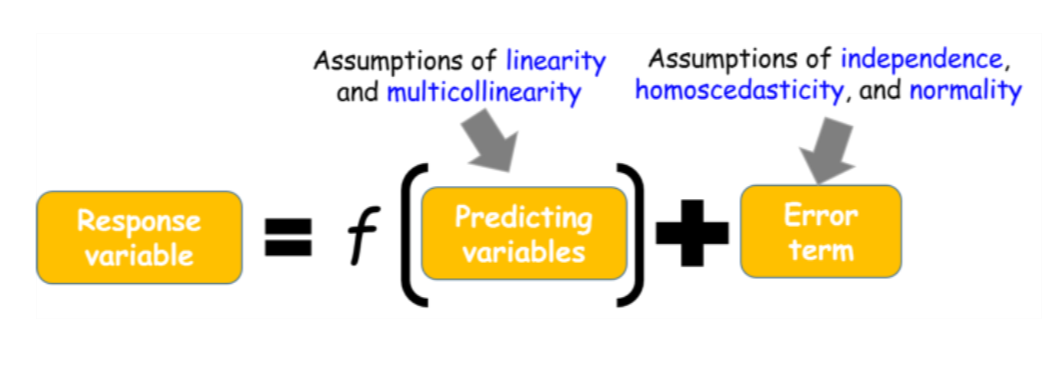

In [3]:
import pandas as pd
monData=pd.read_csv('D:\mon_dataset_ok.csv')

In [4]:
monData

,ID,entrance_date,discharge_date,Gender,Age,Disease,Service
0,1,1/2/2010,1/7/2010,F,12,palustose,Pediatrie
1,2,1/2/2010,1/8/2010,F,30,diabete,Hospitalisation
2,3,1/2/2010,1/9/2010,M,6,hernie,Pediatrie
3,4,1/2/2010,1/10/2010,M,23,infection et diabete,Hospitalisation
4,5,1/2/2010,1/11/2010,M,22,KOD,Gynecologie
...,...,...,...,...,...,...,...
833,834,8/21/2021,7/31/2021,M,3 jours,risque infectieux,Neonatologie
834,835,8/22/2021,8/1/2021,F,4 jours,bebe macroso,Neonatologie
835,836,8/23/2021,8/2/2021,M,5 jours,Faible poids de naissance,Neonatologie
836,837,8/24/2021,8/3/2021,M,6 jours,Faible poids de naissance,Neonatologie


# 1. Exploratory Data Analysis

In [5]:
monData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              838 non-null    int64 
 1   entrance_date   837 non-null    object
 2   discharge_date  837 non-null    object
 3   Gender          838 non-null    object
 4   Age             838 non-null    object
 5   Disease         838 non-null    object
 6   Service         837 non-null    object
dtypes: int64(1), object(6)
memory usage: 46.0+ KB


# 2. Data Preprocessing

In [6]:
monData['Entrance_Date']=pd.to_datetime(monData['entrance_date'])

In [7]:
monData['Discharge_Date']=pd.to_datetime(monData['discharge_date'])

In [8]:
monData['Number_of_days_spent']=monData['Discharge_Date']-monData['Entrance_Date']

In [9]:
monData

,ID,entrance_date,discharge_date,Gender,Age,Disease,Service,Entrance_Date,Discharge_Date,Number_of_days_spent
0,1,1/2/2010,1/7/2010,F,12,palustose,Pediatrie,2010-01-02,2010-01-07,5 days
1,2,1/2/2010,1/8/2010,F,30,diabete,Hospitalisation,2010-01-02,2010-01-08,6 days
2,3,1/2/2010,1/9/2010,M,6,hernie,Pediatrie,2010-01-02,2010-01-09,7 days
3,4,1/2/2010,1/10/2010,M,23,infection et diabete,Hospitalisation,2010-01-02,2010-01-10,8 days
4,5,1/2/2010,1/11/2010,M,22,KOD,Gynecologie,2010-01-02,2010-01-11,9 days
...,...,...,...,...,...,...,...,...,...,...
833,834,8/21/2021,7/31/2021,M,3 jours,risque infectieux,Neonatologie,2021-08-21,2021-07-31,-21 days
834,835,8/22/2021,8/1/2021,F,4 jours,bebe macroso,Neonatologie,2021-08-22,2021-08-01,-21 days
835,836,8/23/2021,8/2/2021,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,2021-08-02,-21 days
836,837,8/24/2021,8/3/2021,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,2021-08-03,-21 days


In [10]:
#We convert timedelta to days
import numpy as np
monData['LOS'] = (monData['Number_of_days_spent']/ np.timedelta64(1, 'D'))
monData

,ID,entrance_date,discharge_date,Gender,Age,Disease,Service,Entrance_Date,Discharge_Date,Number_of_days_spent,LOS
0,1,1/2/2010,1/7/2010,F,12,palustose,Pediatrie,2010-01-02,2010-01-07,5 days,5.0
1,2,1/2/2010,1/8/2010,F,30,diabete,Hospitalisation,2010-01-02,2010-01-08,6 days,6.0
2,3,1/2/2010,1/9/2010,M,6,hernie,Pediatrie,2010-01-02,2010-01-09,7 days,7.0
3,4,1/2/2010,1/10/2010,M,23,infection et diabete,Hospitalisation,2010-01-02,2010-01-10,8 days,8.0
4,5,1/2/2010,1/11/2010,M,22,KOD,Gynecologie,2010-01-02,2010-01-11,9 days,9.0
...,...,...,...,...,...,...,...,...,...,...,...
833,834,8/21/2021,7/31/2021,M,3 jours,risque infectieux,Neonatologie,2021-08-21,2021-07-31,-21 days,-21.0
834,835,8/22/2021,8/1/2021,F,4 jours,bebe macroso,Neonatologie,2021-08-22,2021-08-01,-21 days,-21.0
835,836,8/23/2021,8/2/2021,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,2021-08-02,-21 days,-21.0
836,837,8/24/2021,8/3/2021,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,2021-08-03,-21 days,-21.0


In [11]:
monData=monData.dropna(axis=0, how='any')

In [12]:
monData

,ID,entrance_date,discharge_date,Gender,Age,Disease,Service,Entrance_Date,Discharge_Date,Number_of_days_spent,LOS
0,1,1/2/2010,1/7/2010,F,12,palustose,Pediatrie,2010-01-02,2010-01-07,5 days,5.0
1,2,1/2/2010,1/8/2010,F,30,diabete,Hospitalisation,2010-01-02,2010-01-08,6 days,6.0
2,3,1/2/2010,1/9/2010,M,6,hernie,Pediatrie,2010-01-02,2010-01-09,7 days,7.0
3,4,1/2/2010,1/10/2010,M,23,infection et diabete,Hospitalisation,2010-01-02,2010-01-10,8 days,8.0
4,5,1/2/2010,1/11/2010,M,22,KOD,Gynecologie,2010-01-02,2010-01-11,9 days,9.0
...,...,...,...,...,...,...,...,...,...,...,...
833,834,8/21/2021,7/31/2021,M,3 jours,risque infectieux,Neonatologie,2021-08-21,2021-07-31,-21 days,-21.0
834,835,8/22/2021,8/1/2021,F,4 jours,bebe macroso,Neonatologie,2021-08-22,2021-08-01,-21 days,-21.0
835,836,8/23/2021,8/2/2021,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,2021-08-02,-21 days,-21.0
836,837,8/24/2021,8/3/2021,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,2021-08-03,-21 days,-21.0


In [13]:
monData['LOS']=monData['LOS'].abs()

<ipython-input-13-7b5a7e34317d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monData['LOS']=monData['LOS'].abs()


In [14]:
monData=monData.drop(['entrance_date','discharge_date','Number_of_days_spent','Discharge_Date'],axis=1)

In [15]:
monData['LOS']=monData['LOS'].astype(int)

In [16]:
monData

,ID,Gender,Age,Disease,Service,Entrance_Date,LOS
0,1,F,12,palustose,Pediatrie,2010-01-02,5
1,2,F,30,diabete,Hospitalisation,2010-01-02,6
2,3,M,6,hernie,Pediatrie,2010-01-02,7
3,4,M,23,infection et diabete,Hospitalisation,2010-01-02,8
4,5,M,22,KOD,Gynecologie,2010-01-02,9
...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21


In [17]:
monData['Age_Patient'] = monData.Age.str.extract(r'(^\d+)')

In [18]:
monData

,ID,Gender,Age,Disease,Service,Entrance_Date,LOS,Age_Patient
0,1,F,12,palustose,Pediatrie,2010-01-02,5,12
1,2,F,30,diabete,Hospitalisation,2010-01-02,6,30
2,3,M,6,hernie,Pediatrie,2010-01-02,7,6
3,4,M,23,infection et diabete,Hospitalisation,2010-01-02,8,23
4,5,M,22,KOD,Gynecologie,2010-01-02,9,22
...,...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21,3
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21,4
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21,5
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21,6


 Recuperation seulement des personnes moins d'un an

In [19]:
dataPatientMoinsUnan = monData.loc[monData['Age'].str.contains("jours|Jour", case=False)]

In [20]:
dataPatientMoinsUnan

,ID,Gender,Age,Disease,Service,Entrance_Date,LOS,Age_Patient
177,178,M,5 Jours,I M M,Pediatrie,2013-05-04,46,5
178,179,M,1 Jour,G E febrile,Pediatrie,2013-05-05,36,1
183,184,M,1 Jour,I N N,Pediatrie,2014-05-10,45,1
186,187,F,14 Jours,Tardive probable,Pediatrie,2015-05-13,55,14
252,253,M,3 jours,Faible poids de naissance,Neonatologie,2010-07-18,67,3
...,...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21,3
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21,4
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21,5
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21,6


In [21]:
dataPatientMoinsUnan['Age_Patient']=dataPatientMoinsUnan['Age_Patient'].astype(int)

<ipython-input-21-478c94bad3cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPatientMoinsUnan['Age_Patient']=dataPatientMoinsUnan['Age_Patient'].astype(int)


In [22]:
dataPatientMoinsUnan

,ID,Gender,Age,Disease,Service,Entrance_Date,LOS,Age_Patient
177,178,M,5 Jours,I M M,Pediatrie,2013-05-04,46,5
178,179,M,1 Jour,G E febrile,Pediatrie,2013-05-05,36,1
183,184,M,1 Jour,I N N,Pediatrie,2014-05-10,45,1
186,187,F,14 Jours,Tardive probable,Pediatrie,2015-05-13,55,14
252,253,M,3 jours,Faible poids de naissance,Neonatologie,2010-07-18,67,3
...,...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21,3
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21,4
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21,5
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21,6


In [23]:
dataPatientMoinsUnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 177 to 837
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             141 non-null    int64         
 1   Gender         141 non-null    object        
 2   Age            141 non-null    object        
 3   Disease        141 non-null    object        
 4   Service        141 non-null    object        
 5   Entrance_Date  141 non-null    datetime64[ns]
 6   LOS            141 non-null    int32         
 7   Age_Patient    141 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(4)
memory usage: 8.8+ KB


In [24]:
dataPatientMoinsUnan['Age_Patient']=dataPatientMoinsUnan['Age_Patient'].div(365)

<ipython-input-24-61fe6756ab8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPatientMoinsUnan['Age_Patient']=dataPatientMoinsUnan['Age_Patient'].div(365)


In [25]:
dataPatientMoinsUnan

,ID,Gender,Age,Disease,Service,Entrance_Date,LOS,Age_Patient
177,178,M,5 Jours,I M M,Pediatrie,2013-05-04,46,0.013699
178,179,M,1 Jour,G E febrile,Pediatrie,2013-05-05,36,0.002740
183,184,M,1 Jour,I N N,Pediatrie,2014-05-10,45,0.002740
186,187,F,14 Jours,Tardive probable,Pediatrie,2015-05-13,55,0.038356
252,253,M,3 jours,Faible poids de naissance,Neonatologie,2010-07-18,67,0.008219
...,...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21,0.008219
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21,0.010959
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21,0.013699
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21,0.016438


 Recuperation seulement des personnes plus d'un an

In [26]:
dataPatientPlusUnan=monData[monData["Age"].str.contains("jours|Jour") == False]

In [27]:
dataPatientPlusUnan

,ID,Gender,Age,Disease,Service,Entrance_Date,LOS,Age_Patient
0,1,F,12,palustose,Pediatrie,2010-01-02,5,12
1,2,F,30,diabete,Hospitalisation,2010-01-02,6,30
2,3,M,6,hernie,Pediatrie,2010-01-02,7,6
3,4,M,23,infection et diabete,Hospitalisation,2010-01-02,8,23
4,5,M,22,KOD,Gynecologie,2010-01-02,9,22
...,...,...,...,...,...,...,...,...
743,744,F,27,malaise gravidique,Gynecologie,2017-07-13,168,27
744,745,F,23,malaise gravidique,Gynecologie,2017-07-14,168,23
745,746,F,21,malaise gravidique,Gynecologie,2015-07-15,2024,21
746,747,F,31,malaise gravidique,Gynecologie,2021-07-16,168,31


 On combine les deux dataset pour avoir le dataset final

In [28]:
dataFinal = [dataPatientPlusUnan, dataPatientMoinsUnan]

In [29]:
dataFinal=pd.concat(dataFinal)

In [30]:
dataFinal

,ID,Gender,Age,Disease,Service,Entrance_Date,LOS,Age_Patient
0,1,F,12,palustose,Pediatrie,2010-01-02,5,12
1,2,F,30,diabete,Hospitalisation,2010-01-02,6,30
2,3,M,6,hernie,Pediatrie,2010-01-02,7,6
3,4,M,23,infection et diabete,Hospitalisation,2010-01-02,8,23
4,5,M,22,KOD,Gynecologie,2010-01-02,9,22
...,...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21,0.008219
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21,0.010959
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21,0.013699
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21,0.016438


In [31]:
dataFinal=dataFinal.drop(['Age'],axis=1)

In [32]:
dataFinal

,ID,Gender,Disease,Service,Entrance_Date,LOS,Age_Patient
0,1,F,palustose,Pediatrie,2010-01-02,5,12
1,2,F,diabete,Hospitalisation,2010-01-02,6,30
2,3,M,hernie,Pediatrie,2010-01-02,7,6
3,4,M,infection et diabete,Hospitalisation,2010-01-02,8,23
4,5,M,KOD,Gynecologie,2010-01-02,9,22
...,...,...,...,...,...,...,...
833,834,M,risque infectieux,Neonatologie,2021-08-21,21,0.008219
834,835,F,bebe macroso,Neonatologie,2021-08-22,21,0.010959
835,836,M,Faible poids de naissance,Neonatologie,2021-08-23,21,0.013699
836,837,M,Faible poids de naissance,Neonatologie,2021-08-24,21,0.016438


In [33]:
age=dataFinal["Age_Patient"]
dataFinal.insert(2,'Age',age)

In [34]:
dataFinal=dataFinal.drop(['ID','Age_Patient','Entrance_Date'],axis=1)

In [35]:
dataFinal

,Gender,Age,Disease,Service,LOS
0,F,12,palustose,Pediatrie,5
1,F,30,diabete,Hospitalisation,6
2,M,6,hernie,Pediatrie,7
3,M,23,infection et diabete,Hospitalisation,8
4,M,22,KOD,Gynecologie,9
...,...,...,...,...,...
833,M,0.008219,risque infectieux,Neonatologie,21
834,F,0.010959,bebe macroso,Neonatologie,21
835,M,0.013699,Faible poids de naissance,Neonatologie,21
836,M,0.016438,Faible poids de naissance,Neonatologie,21


In [36]:
dataFinal.Disease.unique()

array(['palustose', 'diabete', 'hernie', 'infection et diabete', 'KOD',
       'choc emotionnel', 'infection uterine', 'Porte entr?e digestif',
       'particolis', 'paludisme', 'palustre', 'Palusisme',
       'hernie bilaterale', 'MAP', 'Paludisme', 'fievre',
       'infection iterine', 'Hernie', 'myome uterine', 'chute faciale',
       'porte entr?e digestif', 'Palustose', 'Palustre et Rhume',
       'grippe et palustre', 'infectieux ', 'Apprendiculaire',
       'crise hypertension', 'infectieux et diabete', 'Gastrite aigue',
       'infectieux grippe', 'infectieux', 'infectieux migneneux',
       'effet du losorton', 'affebrile', 'crise de moque', 'alteagique',
       'ulcere gasto', 'paludisme grave', 'Rhumatisme',
       'encepholite aigue', 'fievre de courte duree', 'obstobeptique',
       'GEA', 'Grippe et palustre', 'palmudisme', 'Palustre',
       'Detresse respiratoire', 'Fed', 'FCD', 'Bronchite Aigue',
       'Enterite febrile ', 'Enterite aigue', 'G E A A ',
       'Rhume B

On enleve les espaces dans la colonne Maladie

In [37]:
dataFinal['Disease'] = dataFinal['Disease'].str.rstrip() 

In [38]:
dataFinal.Disease.unique()

array(['palustose', 'diabete', 'hernie', 'infection et diabete', 'KOD',
       'choc emotionnel', 'infection uterine', 'Porte entr?e digestif',
       'particolis', 'paludisme', 'palustre', 'Palusisme',
       'hernie bilaterale', 'MAP', 'Paludisme', 'fievre',
       'infection iterine', 'Hernie', 'myome uterine', 'chute faciale',
       'porte entr?e digestif', 'Palustose', 'Palustre et Rhume',
       'grippe et palustre', 'infectieux', 'Apprendiculaire',
       'crise hypertension', 'infectieux et diabete', 'Gastrite aigue',
       'infectieux grippe', 'infectieux migneneux', 'effet du losorton',
       'affebrile', 'crise de moque', 'alteagique', 'ulcere gasto',
       'paludisme grave', 'Rhumatisme', 'encepholite aigue',
       'fievre de courte duree', 'obstobeptique', 'GEA',
       'Grippe et palustre', 'palmudisme', 'Palustre',
       'Detresse respiratoire', 'Fed', 'FCD', 'Bronchite Aigue',
       'Enterite febrile', 'Enterite aigue', 'G E A A', 'Rhume Bronchute',
       'F C D

In [39]:
dataFinal.Service.unique()

array(['Pediatrie', 'Hospitalisation', 'Gynecologie', 'Neonatologie'],
      dtype=object)

In [40]:
dataFinal.Gender.unique()

array(['F', 'M'], dtype=object)

Encodage des variables

In [41]:
dataFinal['Gender']=dataFinal['Gender'].replace(['F', 'M'],[0,1])

In [42]:
dataFinal

,Gender,Age,Disease,Service,LOS
0,0,12,palustose,Pediatrie,5
1,0,30,diabete,Hospitalisation,6
2,1,6,hernie,Pediatrie,7
3,1,23,infection et diabete,Hospitalisation,8
4,1,22,KOD,Gynecologie,9
...,...,...,...,...,...
833,1,0.008219,risque infectieux,Neonatologie,21
834,0,0.010959,bebe macroso,Neonatologie,21
835,1,0.013699,Faible poids de naissance,Neonatologie,21
836,1,0.016438,Faible poids de naissance,Neonatologie,21


In [43]:
dataFinal['Service']=dataFinal['Service'].map({'Pediatrie':0, 'Hospitalisation':1,
                                               'Gynecologie':2, 'Neonatologie':3})

In [44]:
dataFinal

,Gender,Age,Disease,Service,LOS
0,0,12,palustose,0,5
1,0,30,diabete,1,6
2,1,6,hernie,0,7
3,1,23,infection et diabete,1,8
4,1,22,KOD,2,9
...,...,...,...,...,...
833,1,0.008219,risque infectieux,3,21
834,0,0.010959,bebe macroso,3,21
835,1,0.013699,Faible poids de naissance,3,21
836,1,0.016438,Faible poids de naissance,3,21


In [45]:
# We create REPLACE_LIST as a trick to help us adapt the names of diseases that in dataFinal['Disease'] to avoid duplicates
REPLACE_LIST={
    "palustose":"Malaria", 
    "diabete":"Diabetes", 
    "hernie":"Hernia", 
    "infection et diabete":"Infection and Diabetes", 
    "KOD":"Right Ovarian Cyst",
    "choc emotionnel":"Emotional trauma", 
    "infection uterine":"Uterine infection", 
    "Porte entr?e digestif":"Digestive tract",
    "paludisme":"Malaria", 
    "palustre":"Malaria", 
    "Palusisme":"Malaria", 
    "hernie bilaterale":"Bilateral hernia", 
    "MAP":"Threat of preterm birth",
    "Paludisme":"Malaria", 
    "fievre":"Fever",  
    "infection iterine":"Uterine infection", 
    "Hernie":"Hernia",
    "myome uterine":"Uterine myoma", 
    "chute faciale":"Facial fall", 
    "porte entr?e digestif":"Digestive tract",
    "Palustose":"Malaria", 
    "Palustre et Rhume":"Flu and malaria", 
    "grippe et palustre":"Flu and malaria",
    "infectieux":"Infection", 
    "Apprendiculaire":"Appendicular", 
    "crise hypertension":"Hypertension crisis",
    "infectieux et diabete":"Infection and Diabetes",
    "Gastrite aigue":"Acute Gastritis", 
    "infectieux grippe":"Influenza",
    "infectieux migneneux":"Infectious Mononucleosis", 
    "effet du losorton":"Losartan effect", 
    "affebrile":"Afebrile",
    "crise de moque":"Mocking seizure", 
    "alteagique":"Allergy", 
    "ulcere gasto":"Peptic ulcer", 
    "paludisme grave":"Severe malaria",
    "Rhumatisme":"Rheumatism", 
    "encepholite aigue":"Acute encephalitis", 
    "fievre de courte duree":"Short-term fever",
    "obstobeptique":"Obstetrical pathology", 
    "particolis":"Chronic valvular disease", 
    "GEA":"Acute gastroenteritis", 
    "Grippe et palustre":"Flu and malaria",
    "palmudisme":"Malaria", 
    "Palustre":"Malaria", 
    "Detresse respiratoire":"Respiratory distress", 
    "Fed":"Focal Cortical Dysplasia", 
    "FCD":"Focal Cortical Dysplasia",
    "Bronchite Aigue":"Acute bronchitis", 
    "Enterite febrile":"Febrile enteritis", 
    "Enterite aigue":"Acute enteritis", 
    "G E A A":"Acute gastroenteritis",
    "Rhume Bronchute":"Cold and bronchitis", 
    "F C D":"Focal Cortical Dysplasia", 
    "G E A":"Acute gastroenteritis", 
    "afebrile":"Afebrile", 
    "Bronchite":"Bronchitis",
    "G E A F":"Acute febrile gastroenteritis", 
    "GEA febrile":"Acute febrile gastroenteritis", 
    "Grande prematur?":"Extreme prematurity", 
    "Infectieux":"Infection",
    "G E A febrile":"Acute febrile gastroenteritis", 
    "Hypertetique":"Hypothermia", 
    "fiere courte duree":"Short-term fever", 
    "sepsis":"Sepsis",
    "Enterite febaine":"Febrile enteritis", 
    "Palustre grave":"Severe malaria", 
    "afebrite":"Afebrile", 
    "I N N":"Neonatal infection", 
    "Rhume":"Flu",
    "Avortement incomplet":"Incomplete abortion", 
    "avortement":"Abortion", 
    "MAV":"Arteriovenous malformation", 
    "Salmonellose":"Salmonellosis",
    "Palusure":"Malaria", 
    "infection couchaire":"Post-partum infection", 
    "hygie du trime":"Vaginal mycoses",
    "cyslite aigue probable":"Probable acute cystitis", 
    "palut":"Malaria", 
    "malaise gravidique":"Pregnancy discomfort", 
    "G":"Gastritis",
    "Polytraumatique":"Polytrauma", 
    "Traumatisme du bassin":"Pelvic trauma",
    "dyspeptique et choc emotionnel":"Dyspeptic and emotional shock", 
    "Demence serile":"Senile Dementia", 
    "Prositose":"Agnosia",
    "I M M":"Neonatal infection", 
    "G E febrile":"Febrile gastroenteritis", 
    "Tardive probable":"Probable late vision",
    "Faible poids de naissance":"Low birth weight", 
    "macrosonie":"Macrosomia", 
    "risque infectieux":"Infectious risk",
    "IN Natale":"Neonatal infection", 
    "hypotrope":"Hypotrophy", 
    "bebe macroso":"Macrosomia", 
    "macroso":"Macrosomia",
    "petit premature":"Medium prematurity", 
    "Asphysie reonatale":"Neonatal asphyxia", 
    "Premature Asphysie":"Asphyxiated preemie"    
}

# We replace the country names in order to match the diseases in the data
dataFinal["Disease"] = dataFinal["Disease"].replace(REPLACE_LIST)

In [46]:
dataFinal.Disease.nunique()

68

In [47]:
dataFinal.Disease.unique()

array(['Malaria', 'Diabetes', 'Hernia', 'Infection and Diabetes',
       'Right Ovarian Cyst', 'Emotional trauma', 'Uterine infection',
       'Digestive tract', 'Chronic valvular disease', 'Bilateral hernia',
       'Threat of preterm birth', 'Fever', 'Uterine myoma', 'Facial fall',
       'Flu and malaria', 'Infection', 'Appendicular',
       'Hypertension crisis', 'Acute Gastritis', 'Influenza',
       'Infectious Mononucleosis', 'Losartan effect', 'Afebrile',
       'Mocking seizure', 'Allergy', 'Peptic ulcer', 'Severe malaria',
       'Rheumatism', 'Acute encephalitis', 'Short-term fever',
       'Obstetrical pathology', 'Acute gastroenteritis',
       'Respiratory distress', 'Focal Cortical Dysplasia',
       'Acute bronchitis', 'Febrile enteritis', 'Acute enteritis',
       'Cold and bronchitis', 'Bronchitis',
       'Acute febrile gastroenteritis', 'Extreme prematurity',
       'Hypothermia', 'Sepsis', 'Neonatal infection', 'Flu',
       'Incomplete abortion', 'Abortion', 'Arte

In [48]:
dataFinal

,Gender,Age,Disease,Service,LOS
0,0,12,Malaria,0,5
1,0,30,Diabetes,1,6
2,1,6,Hernia,0,7
3,1,23,Infection and Diabetes,1,8
4,1,22,Right Ovarian Cyst,2,9
...,...,...,...,...,...
833,1,0.008219,Infectious risk,3,21
834,0,0.010959,Macrosomia,3,21
835,1,0.013699,Low birth weight,3,21
836,1,0.016438,Low birth weight,3,21


In [49]:
#We save data before encoding diseases
dataFinal.to_csv('D:/dataPaperStackingLOS_1.csv', index=False)

In [50]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [51]:
dataFinal.loc[:,['Disease']]=dataFinal.loc[:,['Disease']].apply(enc.fit_transform)

In [52]:
dataFinal.isnull().sum()

Gender     0
Age        0
Disease    0
Service    0
LOS        0
dtype: int64

In [53]:
dataFinal.Disease.unique()

array([43, 17, 30, 36, 58, 20, 65, 18, 15, 13, 64, 25, 66, 22, 27, 35, 10,
       31,  1, 39, 37, 40,  7, 45,  9, 50, 62, 57,  3, 63, 48,  6, 56, 28,
        2, 23,  4, 16, 14,  5, 21, 32, 61, 47, 26, 34,  0, 11, 59, 52, 67,
       54, 53, 29, 51, 49, 19, 60,  8, 24, 55, 41, 42, 38, 33, 44, 46, 12])

In [54]:
#We save data encoded
dataFinal.to_csv('D:/dataPaperStackingLOS_2.csv', index=False)

In [55]:
"""
#Les valeurs correspondant aux strings
67:Vaginal mycoses
66:Uterine myoma
65:Uterine infection
64:Threat of preterm birth
63:Short-term fever
62:Severe malaria
61:Sepsis
60:Senile Dementia
59:Salmonellosis
58:Right Ovarian Cyst
57:Rheumatism
56:Respiratory distress
55:Probable late vision
54:Probable acute cystitis
53:Pregnancy discomfort
52:Post-partum infection
51:Polytrauma
50:Peptic ulcer
49:Pelvic trauma
48:Obstetrical pathology
47:Neonatal infection
46:Neonatal asphyxia
45:Mocking seizure
44:Medium prematurity
43:Malaria
42:Macrosomia
41:Low birth weight
40:Losartan effect
39:Influenza
38:Infectious risk
37:Infectious Mononucleosis
36:Infection and Diabetes
35:Infection
34:Incomplete abortion
33:Hypotrophy
32:Hypothermia
31:Hypertension crisis
30:Hernia
29:Gastritis
28:Focal Cortical Dysplasia
27:Flu and malaria
26:Flu
25:Fever
24:Febrile gastroenteritis
23:Febrile enteritis
22:Facial fall
21:Extreme prematurity
20:Emotional trauma
19:Dyspeptic and emotional shock
18:Digestive tract
17:Diabetes
16:Cold and bronchitis
15:Chronic valvular disease
14:Bronchitis
13:Bilateral hernia
12:Asphyxiated preemie
11:Arteriovenous malformation
10:Appendicular
9:Allergy
8:Agnosia
7:Afebrile
6:Acute gastroenteritis
5:Acute febrile gastroenteritis
4:Acute enteritis
3:Acute encephalitis
2:Acute bronchitis
1:Acute Gastritis
0:Abortion
"""

'\n#Les valeurs correspondant aux strings\n67:Vaginal mycoses\n66:Uterine myoma\n65:Uterine infection\n64:Threat of preterm birth\n63:Short-term fever\n62:Severe malaria\n61:Sepsis\n60:Senile Dementia\n59:Salmonellosis\n58:Right Ovarian Cyst\n57:Rheumatism\n56:Respiratory distress\n55:Probable late vision\n54:Probable acute cystitis\n53:Pregnancy discomfort\n52:Post-partum infection\n51:Polytrauma\n50:Peptic ulcer\n49:Pelvic trauma\n48:Obstetrical pathology\n47:Neonatal infection\n46:Neonatal asphyxia\n45:Mocking seizure\n44:Medium prematurity\n43:Malaria\n42:Macrosomia\n41:Low birth weight\n40:Losartan effect\n39:Influenza\n38:Infectious risk\n37:Infectious Mononucleosis\n36:Infection and Diabetes\n35:Infection\n34:Incomplete abortion\n33:Hypotrophy\n32:Hypothermia\n31:Hypertension crisis\n30:Hernia\n29:Gastritis\n28:Focal Cortical Dysplasia\n27:Flu and malaria\n26:Flu\n25:Fever\n24:Febrile gastroenteritis\n23:Febrile enteritis\n22:Facial fall\n21:Extreme prematurity\n20:Emotional tra

In [56]:
dataFinal

,Gender,Age,Disease,Service,LOS
0,0,12,43,0,5
1,0,30,17,1,6
2,1,6,30,0,7
3,1,23,36,1,8
4,1,22,58,2,9
...,...,...,...,...,...
833,1,0.008219,38,3,21
834,0,0.010959,42,3,21
835,1,0.013699,41,3,21
836,1,0.016438,41,3,21


In [57]:
dataFinal

,Gender,Age,Disease,Service,LOS
0,0,12,43,0,5
1,0,30,17,1,6
2,1,6,30,0,7
3,1,23,36,1,8
4,1,22,58,2,9
...,...,...,...,...,...
833,1,0.008219,38,3,21
834,0,0.010959,42,3,21
835,1,0.013699,41,3,21
836,1,0.016438,41,3,21


In [58]:
dataFinal['Age']=dataFinal['Age'].astype('float')

In [59]:
dataFinal

,Gender,Age,Disease,Service,LOS
0,0,12.000000,43,0,5
1,0,30.000000,17,1,6
2,1,6.000000,30,0,7
3,1,23.000000,36,1,8
4,1,22.000000,58,2,9
...,...,...,...,...,...
833,1,0.008219,38,3,21
834,0,0.010959,42,3,21
835,1,0.013699,41,3,21
836,1,0.016438,41,3,21


Text(0.5, 0.3, '')

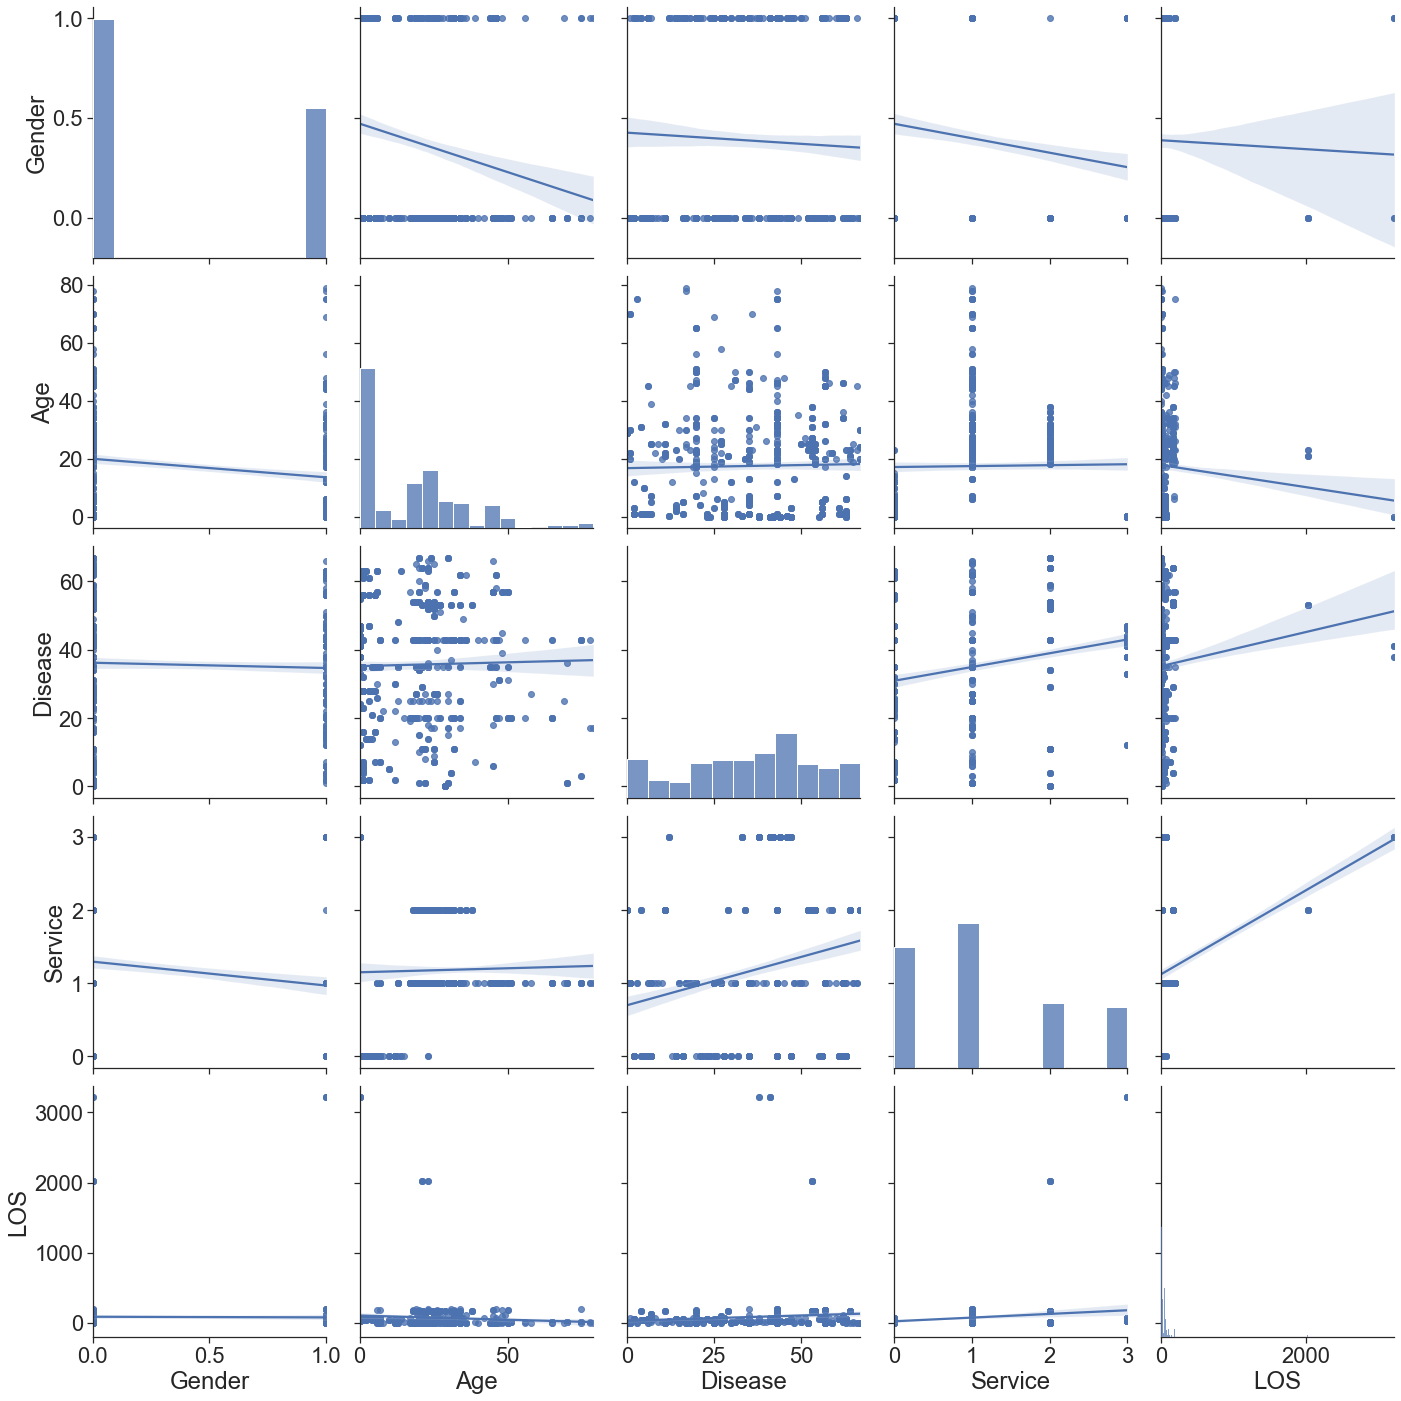

In [60]:
import seaborn as sns
sns.set(style='ticks',color_codes=True,font_scale=2)
g=sns.pairplot(dataFinal,height=4,diag_kind='hist',kind='reg')
g.fig.suptitle('',y=0.3)

In [61]:
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 837
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   835 non-null    int64  
 1   Age      835 non-null    float64
 2   Disease  835 non-null    int32  
 3   Service  835 non-null    int64  
 4   LOS      835 non-null    int32  
dtypes: float64(1), int32(2), int64(2)
memory usage: 32.6 KB


In [62]:
dataFinal.to_csv(r'C:\Users\user\Dropbox\KCA\PaperProjects\StackedRegressorPatientDischarge\LOS_Patient.csv',float_format='%g', index=False)

# 3. Statistical understanding of data

Exploring skewness in Nbre_jours

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 83.84 and sigma = 311.43



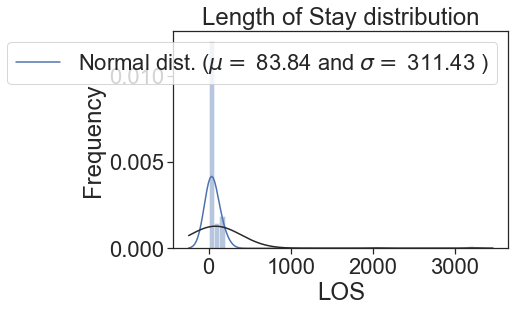

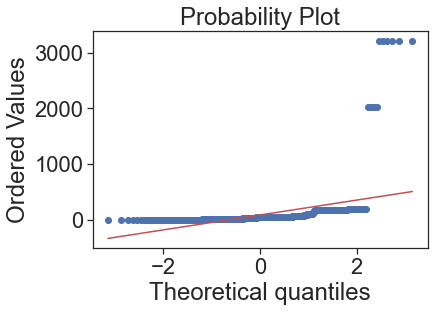

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(dataFinal['LOS'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataFinal['LOS'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Length of Stay distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dataFinal['LOS'], plot=plt)
plt.show()

Exploring skewness in Genre

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.39 and sigma = 0.49



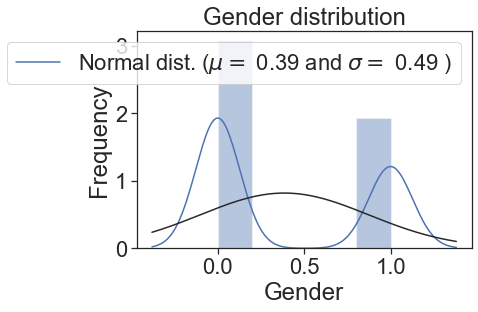

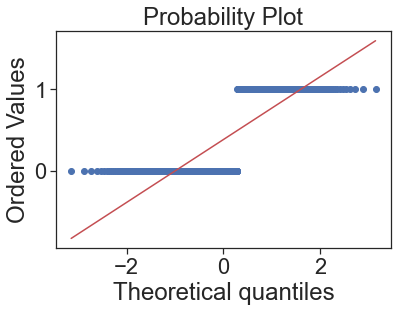

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(dataFinal['Gender'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataFinal['Gender'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Gender distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dataFinal['Gender'], plot=plt)
plt.show()

Exploring skewness in Age

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 17.50 and sigma = 17.67



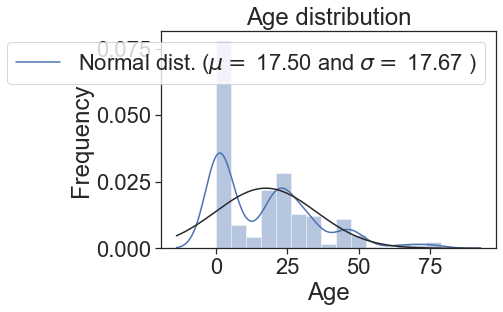

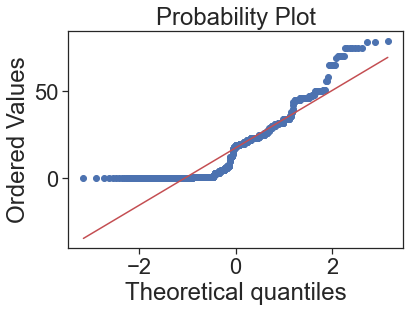

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(dataFinal['Age'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataFinal['Age'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Age distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dataFinal['Age'], plot=plt)
plt.show()

Taking a peek at the relationship between features and the target

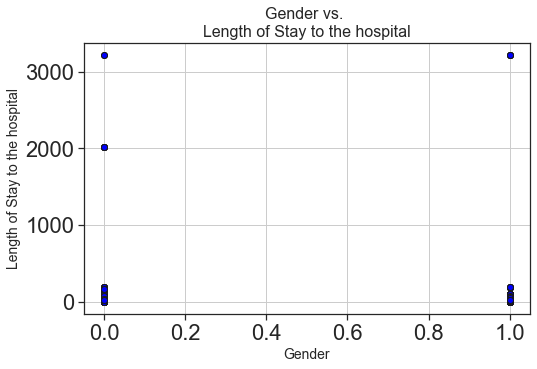

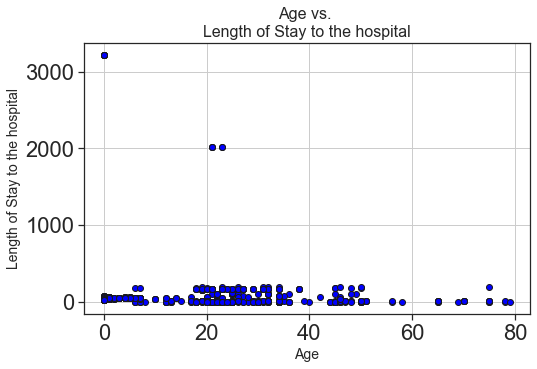

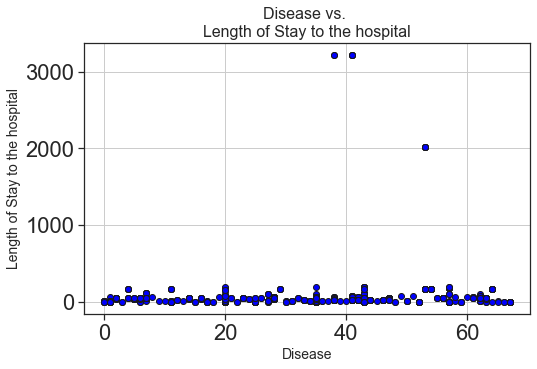

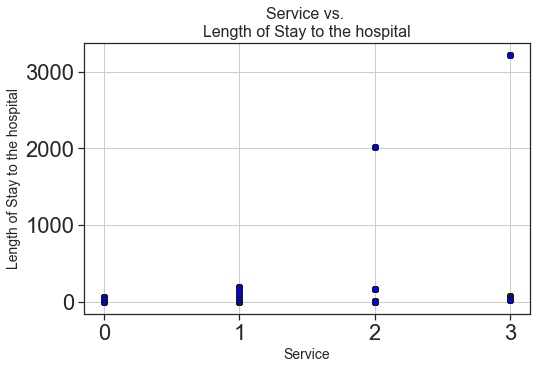

In [66]:
for c in dataFinal.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nLength of Stay to the hospital".format(c),fontsize=16)
    plt.scatter(x=dataFinal[c],y=dataFinal['LOS'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Length of Stay to the hospital',fontsize=14)
    plt.show()

Checking outliers

<AxesSubplot:>

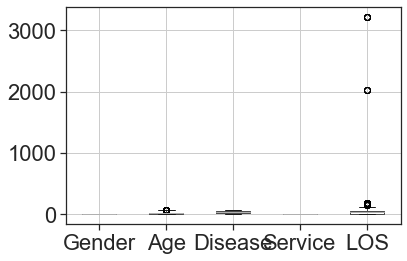

In [67]:
#numeric_col = ['Genre','Age','Maladie','Service','Nbre_jours']
dataFinal.boxplot()

In [68]:
#Age and Nbre_jours have outliers because there are points that lie outside
#the upper whiskers.

Checking outliers using seaborn

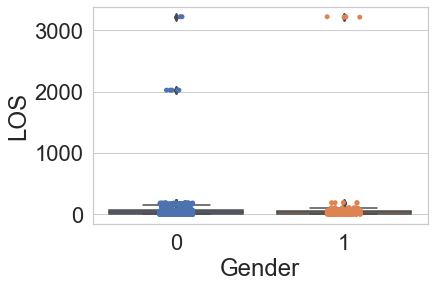

In [69]:
# Boxplot with Seaborn
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='Gender',y='LOS',data=dataFinal)
ax = sns.stripplot(x="Gender", y="LOS",data=dataFinal)

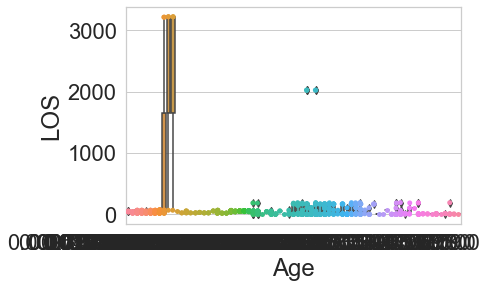

In [70]:
ax= sns.boxplot(x='Age',y='LOS',data=dataFinal)
ax = sns.stripplot(x="Age", y="LOS",data=dataFinal)

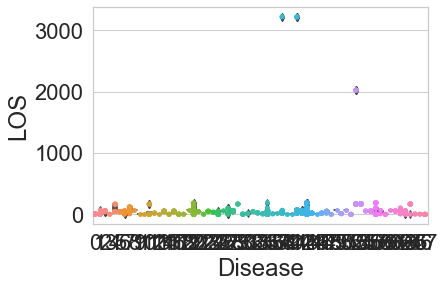

In [71]:
ax= sns.boxplot(x='Disease',y='LOS',data=dataFinal)
ax = sns.stripplot(x="Disease", y="LOS",data=dataFinal)

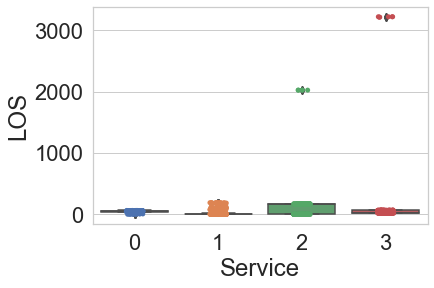

In [72]:
ax= sns.boxplot(x='Service',y='LOS',data=dataFinal)
ax = sns.stripplot(x="Service", y='LOS',data=dataFinal)

Removing outliers

In [73]:
for x in ['LOS']:
    q75,q25 = np.percentile(dataFinal.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dataFinal.loc[dataFinal[x] < min,x] = np.nan
    dataFinal.loc[dataFinal[x] > max,x] = np.nan

In [74]:
for x in ['Age']:
    q75,q25 = np.percentile(dataFinal.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dataFinal.loc[dataFinal[x] < min,x] = np.nan
    dataFinal.loc[dataFinal[x] > max,x] = np.nan

Dropna after removing outliers

In [75]:
dataFinal=dataFinal.dropna(axis=0,how='any')

In [76]:
dataFinal

,Gender,Age,Disease,Service,LOS
0,0,12.000000,43,0,5.0
1,0,30.000000,17,1,6.0
2,1,6.000000,30,0,7.0
3,1,23.000000,36,1,8.0
4,1,22.000000,58,2,9.0
...,...,...,...,...,...
833,1,0.008219,38,3,21.0
834,0,0.010959,42,3,21.0
835,1,0.013699,41,3,21.0
836,1,0.016438,41,3,21.0


<AxesSubplot:>

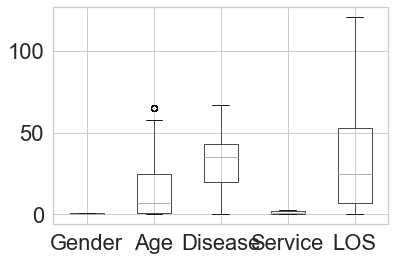

In [77]:
dataFinal.boxplot()

In [78]:
dataFinal.describe()

,Gender,Age,Disease,Service,LOS
count,708.000000,708.000000,708.000000,708.000000,708.000000
mean,0.435028,15.109856,34.216102,1.062147,32.644068
std,0.496111,16.400068,17.807391,1.065908,27.722516
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,7.000000
50%,0.000000,7.000000,35.000000,1.000000,25.000000
75%,1.000000,25.000000,43.000000,2.000000,53.000000
max,1.000000,65.000000,67.000000,3.000000,121.000000


Removing skewness

<ipython-input-79-d8a690bb3377>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFinal["LOS"] = np.log1p(dataFinal["LOS"])
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 2.98 and sigma = 1.22



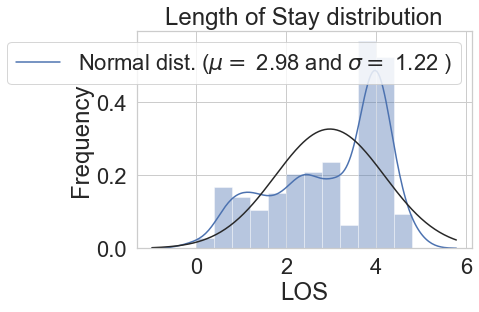

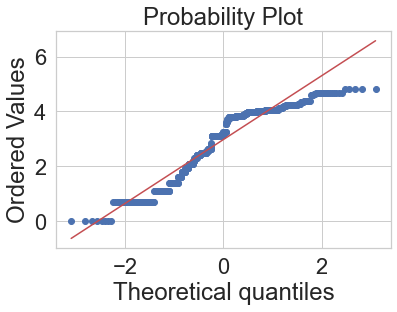

In [79]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of
#the column
dataFinal["LOS"] = np.log1p(dataFinal["LOS"])
#Check the new distribution 
sns.distplot(dataFinal['LOS'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataFinal['LOS'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Length of Stay distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dataFinal['LOS'], plot=plt)
plt.show()

<ipython-input-80-1cd40989f781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFinal["Age"] = np.log1p(dataFinal["Age"])
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 1.97 and sigma = 1.44



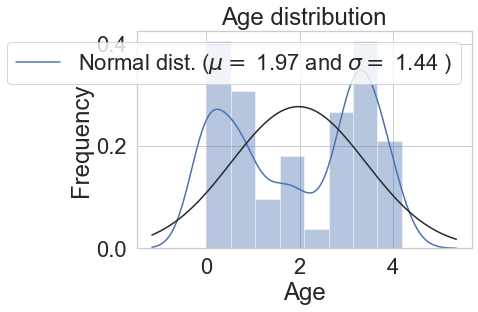

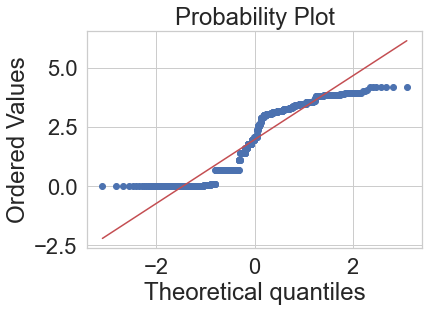

In [80]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
dataFinal["Age"] = np.log1p(dataFinal["Age"])
#Check the new distribution 
sns.distplot(dataFinal['Age'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataFinal['Age'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Age distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dataFinal['Age'], plot=plt)
plt.show()

In [81]:
dataFinal['Disease'].head()

0    43
1    17
2    30
3    36
4    58
Name: Disease, dtype: int32

In [82]:
#We used MinMaxScaler to remove outliers in this column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataFinal[['Disease']])
dataFinal['Disease']=scaler.transform(dataFinal[['Disease']])

<ipython-input-82-f9b64e27c4fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFinal['Disease']=scaler.transform(dataFinal[['Disease']])


In [83]:
dataFinal['Disease'].head()

0    0.641791
1    0.253731
2    0.447761
3    0.537313
4    0.865672
Name: Disease, dtype: float64

<ipython-input-84-b378fd9a00f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFinal["Service"] = np.log1p(dataFinal["Service"])
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.59 and sigma = 0.51



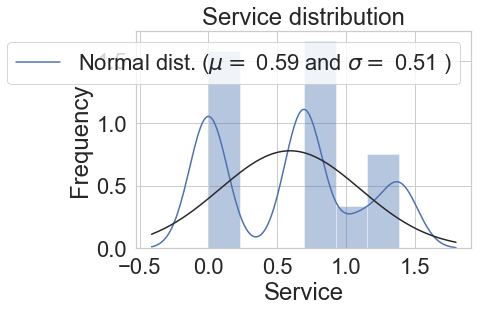

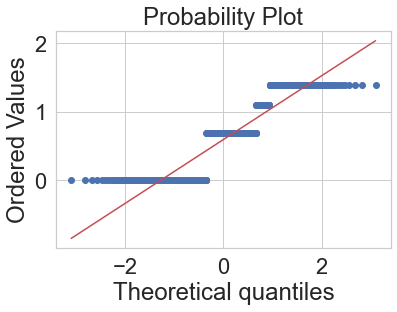

In [84]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column

dataFinal["Service"] = np.log1p(dataFinal["Service"])
#Check the new distribution 
sns.distplot(dataFinal['Service'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataFinal['Service'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Service distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dataFinal['Service'], plot=plt)
plt.show()

<ipython-input-85-9f69b9c6ce1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFinal["Gender"] = np.log1p(dataFinal["Gender"])
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.30 and sigma = 0.34



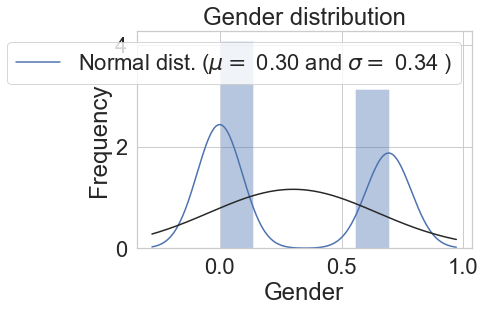

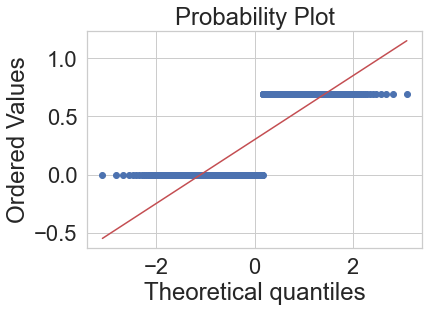

In [85]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column

dataFinal["Gender"] = np.log1p(dataFinal["Gender"])
#Check the new distribution 
sns.distplot(dataFinal['Gender'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataFinal['Gender'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Gender distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dataFinal['Gender'], plot=plt)
plt.show()

<AxesSubplot:>

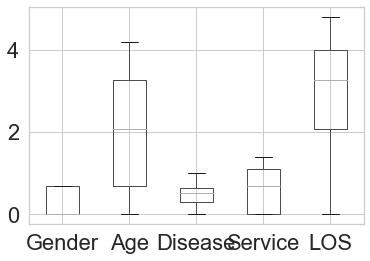

In [86]:
dataFinal.boxplot()

Rechecking the relationship between features and the target

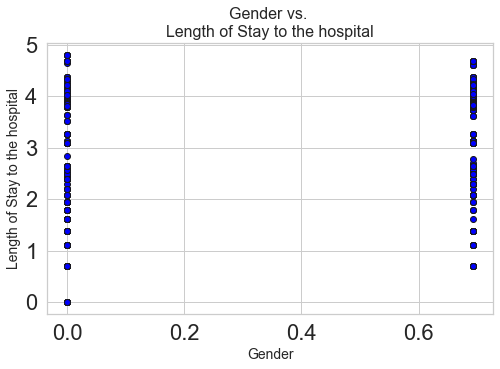

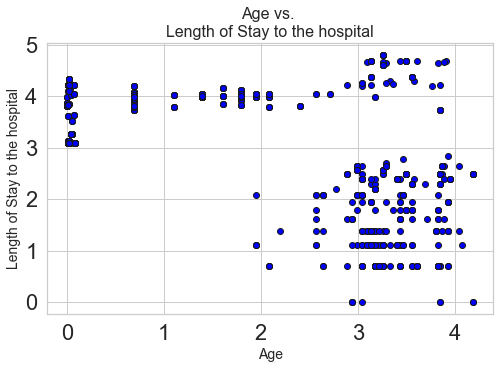

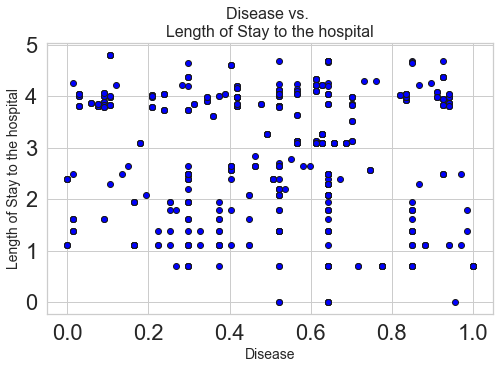

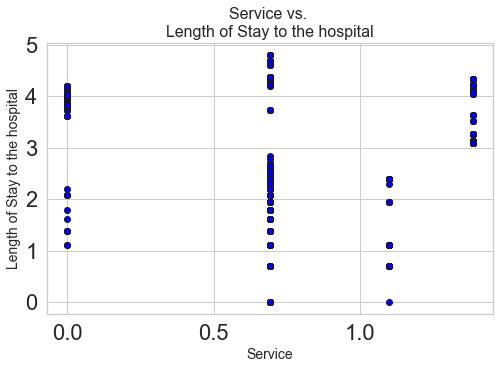

In [87]:
for c in dataFinal.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nLength of Stay to the hospital".format(c),fontsize=16)
    plt.scatter(x=dataFinal[c],y=dataFinal['LOS'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Length of Stay to the hospital',fontsize=14)
    plt.show()

In [88]:
dataFinal

,Gender,Age,Disease,Service,LOS
0,0.000000,2.564949,0.641791,0.000000,1.791759
1,0.000000,3.433987,0.253731,0.693147,1.945910
2,0.693147,1.945910,0.447761,0.000000,2.079442
3,0.693147,3.178054,0.537313,0.693147,2.197225
4,0.693147,3.135494,0.865672,1.098612,2.302585
...,...,...,...,...,...
833,0.693147,0.008186,0.567164,1.386294,3.091042
834,0.000000,0.010899,0.626866,1.386294,3.091042
835,0.693147,0.013606,0.611940,1.386294,3.091042
836,0.693147,0.016305,0.611940,1.386294,3.091042


Creating formula for creating a linear model

In [89]:
import statsmodels.formula.api as sm
#Formula
formula_model = dataFinal.columns[-1]+' ~ '+'+'.join(dataFinal.columns[:-1])
formula_model 

'LOS ~ Gender+Age+Disease+Service'

Construction and fitting of the model

In [90]:
linear_model=sm.ols(formula=formula_model, data=dataFinal)
fitted_model = linear_model.fit()

In [91]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    LOS   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     144.7
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           3.26e-90
Time:                        10:13:56   Log-Likelihood:                -932.47
No. Observations:                 708   AIC:                             1875.
Df Residuals:                     703   BIC:                             1898.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3306      0.100     43.237      0.0

Creating a Dataframe for p-values and statistical significance of out features

In [92]:
dataFinal_pvalues_features=pd.DataFrame()
dataFinal_pvalues_features['p-values']=fitted_model.pvalues[1:]
dataFinal_pvalues_features['Features']=dataFinal.columns[:-1]

In [93]:
#We set Features as index
dataFinal_pvalues_features.set_index('Features',inplace=True)

In [94]:
#Function to check the statistical significance of a feature
def sig_yes_no(feature):
    if feature:
        return 'Yes'
    else:
        return 'No'

In [95]:
dataFinal_pvalues_features['Is it Statistically significant?']=dataFinal_pvalues_features['p-values'].apply(sig_yes_no)

In [96]:
dataFinal_pvalues_features

,p-values,Is it Statistically significant?
Features,,
Gender,1.994555e-03,Yes
Age,9.607388e-69,Yes
Disease,2.425070e-01,Yes
Service,5.734538e-26,Yes


In [97]:
#dataFinal_pvalues_features['p-values']=dataFinal_pvalues_features.reset_option('display.float_format')
#dataFinal_pvalues_features.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.float_format', '{:.3f}'.format)
dataFinal_pvalues_features=pd.DataFrame(dataFinal_pvalues_features)

In [98]:
dataFinal_pvalues_features

,p-values,Is it Statistically significant?
Features,,
Gender,0.002,Yes
Age,0.000,Yes
Disease,0.243,Yes
Service,0.000,Yes


In [99]:
#All of our predicting variables are statisticall significant with the threshold of p-value <0.01

Checking of multicolinearity

In [100]:
#Checking of multicolineality
corr = dataFinal[:-1].corr()
corr

,Gender,Age,Disease,Service,LOS
Gender,1.000,-0.159,0.024,-0.126,0.215
Age,-0.159,1.000,-0.018,0.030,-0.578
Disease,0.024,-0.018,1.000,0.188,-0.081
Service,-0.126,0.030,0.188,1.000,-0.348
LOS,0.215,-0.578,-0.081,-0.348,1.000


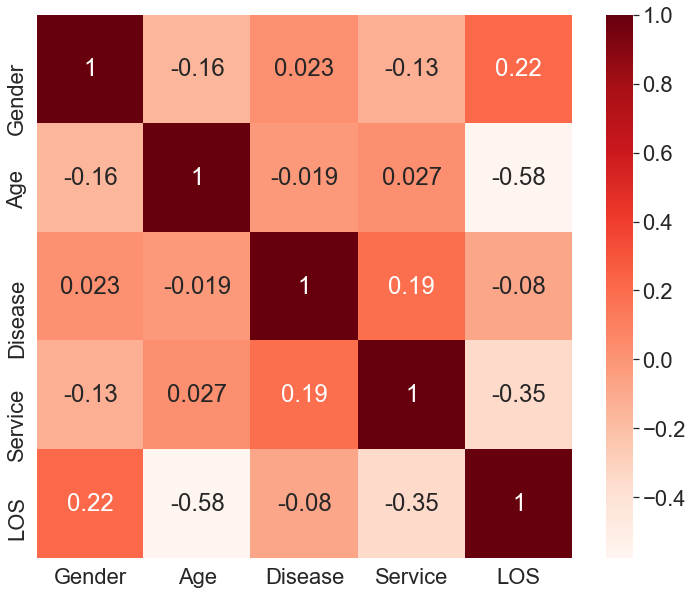

In [101]:
#Checking the correlation of variables using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataFinal.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [102]:
#The correlation coefficient has values between -1 to 1
    #A value closer to 0 implies weaker correlation (exact 0 implying no
    #correlation)
    #A value closer to 1 implies stronger positive correlation
    #A value closer to -1 implies stronger negative correlation

In [103]:
#Correlation with output variable
cor_target = abs(cor["LOS"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Age   0.577
LOS   1.000
Name: LOS, dtype: float64

In [104]:
#As we can see above, there is no feature which has greater than 0.5 of
#correlation with the target

Checking of the variance inflation in features

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [106]:
for i in range(len(dataFinal.columns[:-1])):
    v=vif(np.matrix(dataFinal[:-1]),i)
    print("Variance inflation factor for {}: {}".format(
        dataFinal.columns[i],round(v,2)))

Variance inflation factor for Gender: 1.85
Variance inflation factor for Age: 2.15
Variance inflation factor for Disease: 4.31
Variance inflation factor for Service: 2.24


In [107]:
#There is no feature with VIF > 10, thereby indicating no significant
#multicollinearity

Checking Linearity and normality test

Text(0.5, 0.3, '')

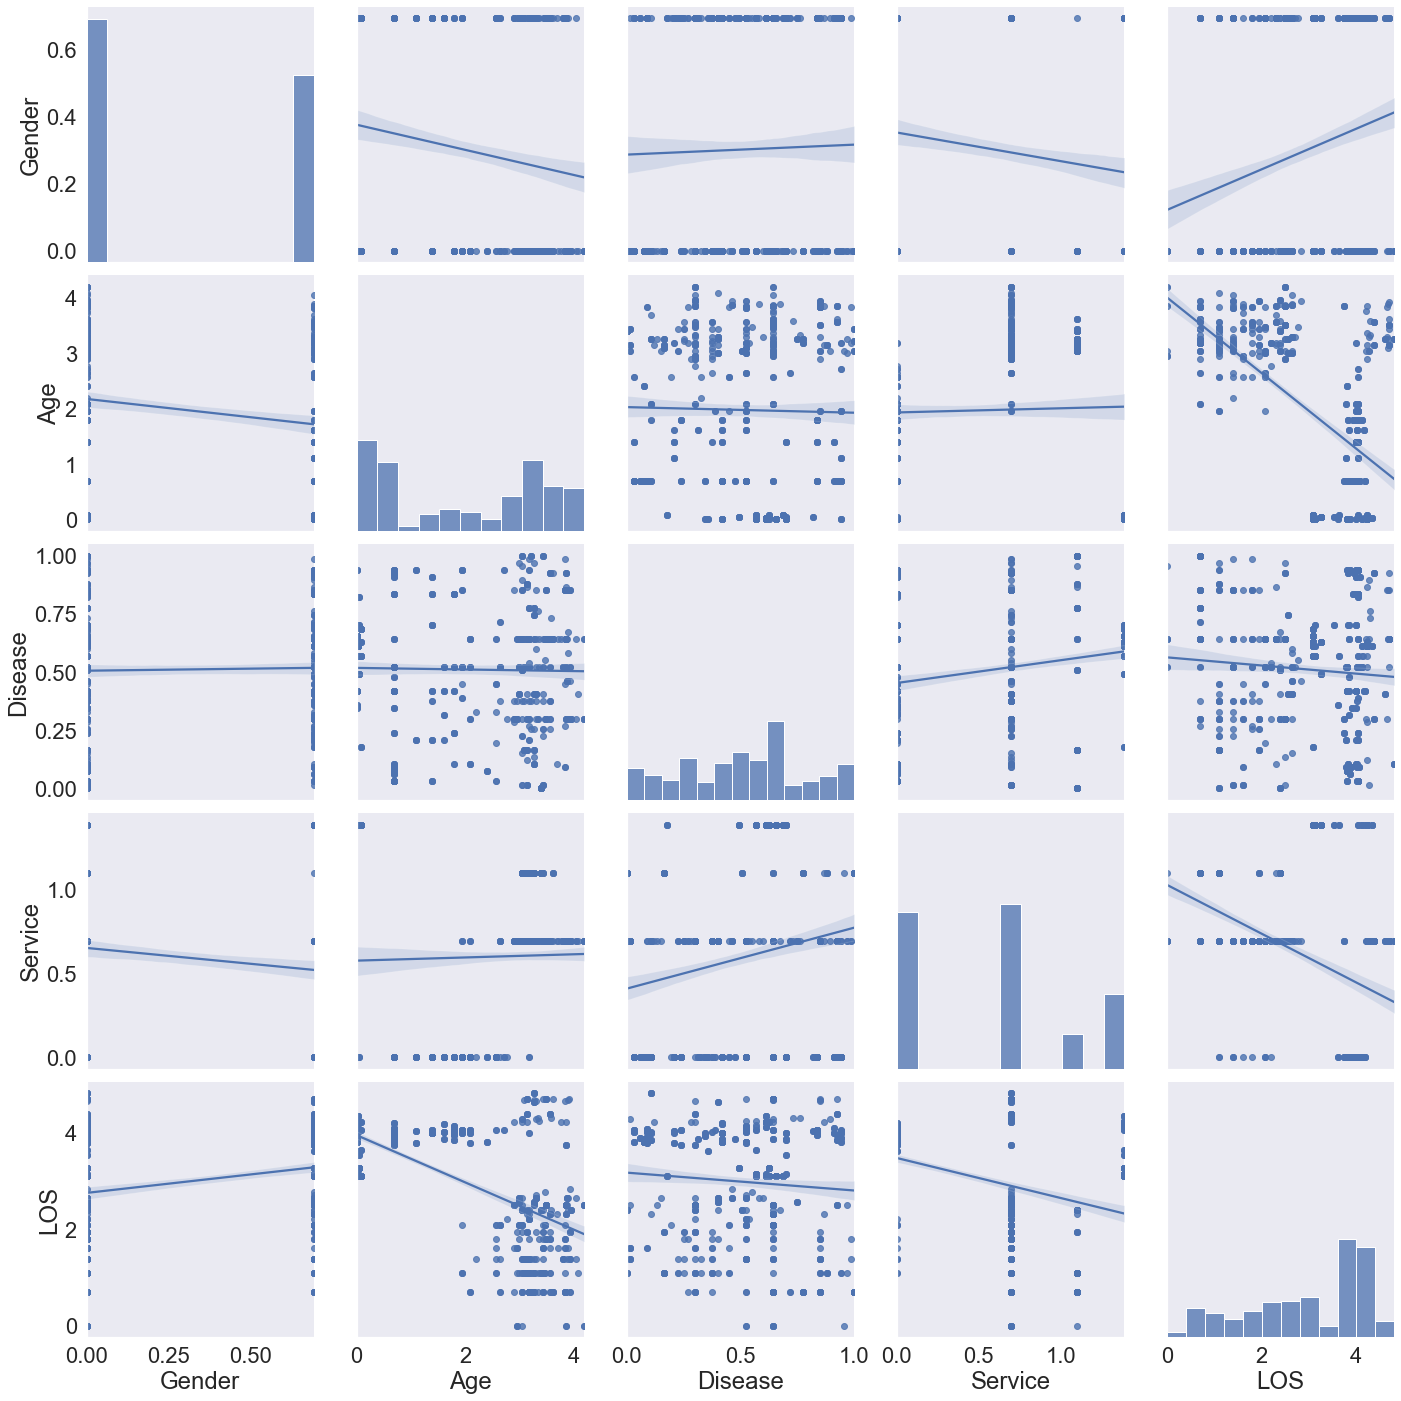

In [108]:
import seaborn as sns
#sns.set(style='ticks',color_codes=True,font_scale=2)
sns.set_style('dark')
g=sns.pairplot(dataFinal,height=4,diag_kind='hist',kind='reg',palette='gist_heat')
g.fig.suptitle('',y=0.3)

Checking Homoscedaticity

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Homoscedasticity')

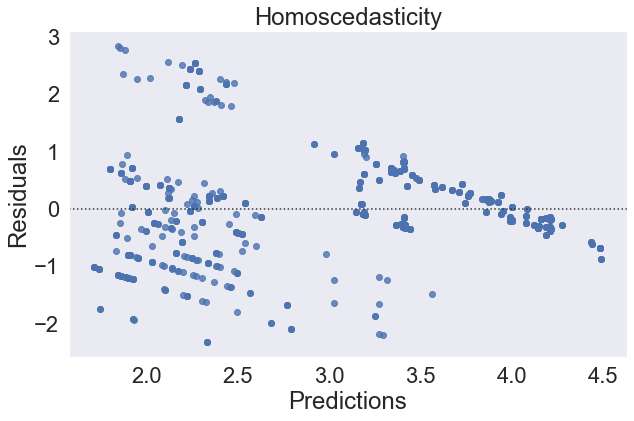

In [109]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,6))
pred_val=fitted_model.fittedvalues.copy()
true_val=dataFinal['LOS'].values.copy()
residuals=true_val - pred_val

res=sns.residplot(pred_val,residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title("Homoscedasticity")

In [110]:
#When the predicted valeus are less, the residuals are also less. Though we can see when the predicted values are 
#big, the residuals value trend to be less. To verify if there is homoscedacitycity, we computed pearson correlation of 
#predicted values and residuals and we got -0.0. This confirm the assumption of homoscdascity. Because the correlation
#between the predicted values and the residuals was not significant, we concluded that the assumption of homoscedasticity
#was satisfied.

In [111]:
#Still checking homoscedasticity 

In [112]:
corrh=pred_val.corr(residuals)
print("{:f}".format(corrh)) 

0.000000


In [113]:
corrh=residuals.corr(pred_val)
print("{:f}".format(corrh)) 

0.000000


Normality of errors

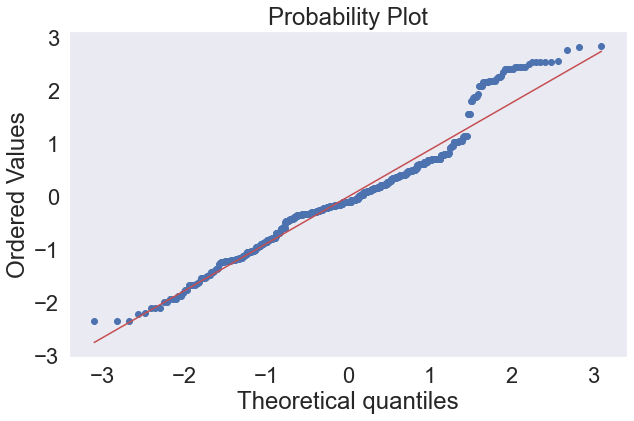

In [114]:
import scipy.stats as stats
fig,ax=plt.subplots(figsize=(10,6))
stats.probplot(residuals,dist='norm',plot=plt)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


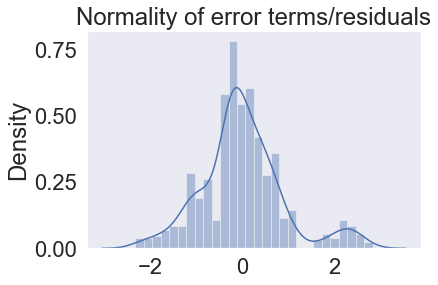

In [115]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Checking of no autocorellation of residuals

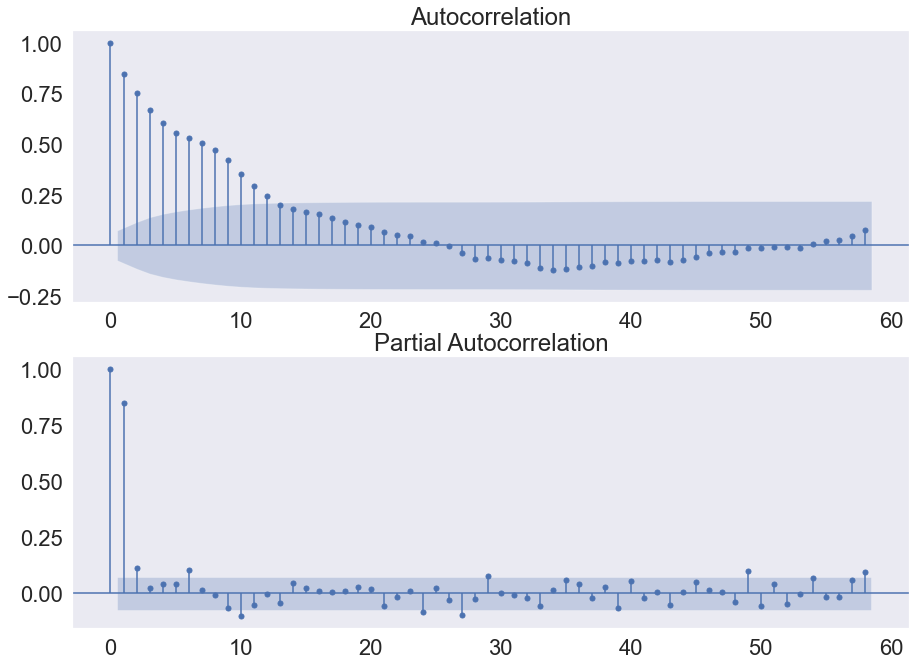

In [116]:
plt.figure(figsize=(15,11))
ax = plt.subplot(211)
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags=58, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(residuals, lags=58, ax=ax);

# 4. Model Creation 

1. Getting features and the Target

In [117]:
X=dataFinal.drop(['LOS'],axis=1)
y=dataFinal['LOS']

2. Splitting the dataset to training and test set

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,random_state=101, test_size=0.20)
#Good model only when random_state is 101 and test_size is 0.25

3. Models Creation

3.1. Random Forest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [121]:
y_predict_RF=RFR.predict(X_test)

In [122]:
from sklearn import metrics
import numpy as np
mae_RF= metrics.mean_absolute_error(y_test,y_predict_RF)
r2_score_RF=metrics.r2_score(y_test,y_predict_RF)
mse_RF= metrics.mean_squared_error(y_test, y_predict_RF)
rmse_RF= np.sqrt(metrics.mean_squared_error(y_test, y_predict_RF))
accuracy_RF=RFR.score(X_test,y_test)

3.2. Extra Tree Regressor

In [123]:
from sklearn.ensemble import ExtraTreesRegressor
etr= ExtraTreesRegressor()
etr.fit(X_train,y_train)

ExtraTreesRegressor()

In [124]:
y_predict_etr=etr.predict(X_test)

In [125]:
from sklearn import metrics
import numpy as np
mae_ETR= metrics.mean_absolute_error(y_test,y_predict_etr)
r2_score_ETR=metrics.r2_score(y_test,y_predict_etr)
mse_ETR= metrics.mean_squared_error(y_test, y_predict_etr)
rmse_ETR= np.sqrt(metrics.mean_squared_error(y_test, y_predict_etr))
accuracy_ETR=etr.score(X_test,y_test)

3.3.Decision Tree

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
model_DTR=DecisionTreeRegressor()
model_DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [128]:
dt_pred=model_DTR.predict(X_test)

In [129]:
from sklearn import metrics

dt_mae=metrics.mean_absolute_error(y_test,dt_pred)
dt_r2=metrics.r2_score(y_test,dt_pred)
dt_mse=metrics.mean_squared_error(y_test, dt_pred)
dt_rmse=np.sqrt(metrics.mean_squared_error(y_test, dt_pred))
dt_accuracy=model_DTR.score(X_test,y_test)

3.4. XGBoost

In [130]:
#!pip install xgboost

In [131]:
import xgboost as xgb

In [132]:
xg_reg = xgb.XGBRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)

In [133]:
x_train_float=X_train.astype('float')
xg_reg.fit(x_train_float,y_train)
x_test_float=X_test.astype('float')
preds_xgboost = xg_reg.predict(x_test_float)

In [134]:
from sklearn import metrics

mae_xgboost=metrics.mean_absolute_error(y_test,preds_xgboost)
r2_xgboost=metrics.r2_score(y_test,preds_xgboost)
mse_xgboost=metrics.mean_squared_error(y_test, preds_xgboost)
rmse_xgboost=np.sqrt(metrics.mean_squared_error(y_test, preds_xgboost))
x_test_float=X_test.astype('float')
accuracy_xgboost=xg_reg.score(x_test_float,y_test)

3.4. ANN

In [135]:
from keras.models import Sequential
from keras.layers import Dense

In [136]:
X_train.shape[1]

4

In [137]:

ANN_model = Sequential()

# The Input Layer :
#N.B: X_train.shape[1] returns 4 as number of features
ANN_model.add(Dense(256, kernel_initializer='normal',
                    input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
ANN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
ANN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
ANN_model.compile(loss='mean_absolute_error', optimizer='adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 108,289
Trainable params: 108,289
Non-trainable params: 0
_________________________________________________________________


In [138]:
#Training the model
x_train_array = X_train.astype('float') #We convert in order to transform
#our data to a tensor
y_train_array=y_train.astype('float')
ANN_model.fit(x_train_array, y_train_array, epochs=100, batch_size=10)

Epoch 1/100
57/57 [==============================] - 1s 3ms/step - loss: 1.8376
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 0.8825
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 0.6981
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 0.6651
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5844
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5624
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5973
Epoch 8/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5761
Epoch 9/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5605
Epoch 10/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5602
Epoch 11/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5625
Epoch 12/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5705
Epoch 13/100
57/57 [=================

In [139]:
x_test_array=X_test.astype('float')
y_ANN=ANN_model.predict(x_test_array)

In [140]:
from sklearn import metrics

mae_ANN=metrics.mean_absolute_error(y_test,y_ANN)
r2_ANN=metrics.r2_score(y_test,y_ANN)
mse_ANN=metrics.mean_squared_error(y_test, y_ANN)
rmse_ANN=np.sqrt(metrics.mean_squared_error(y_test, y_ANN))
accuracy_ANN=ANN_model.evaluate(x_test_array,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4505


In [141]:
#!pip install lightgbm 

3.5. Light GBM

In [142]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor()

In [143]:
model_lgb.fit(X_train, y_train) 
y_model_lgb=model_lgb.predict(X_test)

In [144]:
mae_LGBM=metrics.mean_absolute_error(y_test,y_model_lgb)
r2_LGBM=metrics.r2_score(y_test,y_model_lgb)
mse_LGBM=metrics.mean_squared_error(y_test, y_model_lgb)
rmse_LGBM=np.sqrt(metrics.mean_squared_error(y_test, y_model_lgb))
accuracy_LGBM=model_lgb.score(X_test,y_test)

SVM

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVR

In [146]:
model_svr=SVR(kernel='rbf')
model_svr.fit(X_train, y_train) 
y_model_svr=model_svr.predict(X_test)

In [147]:
from sklearn import metrics

mae_svr=metrics.mean_absolute_error(y_test,y_model_svr)
r2_svr=metrics.r2_score(y_test,y_model_svr)
mse_svr=metrics.mean_squared_error(y_test, y_model_svr)
rmse_svr=np.sqrt(metrics.mean_squared_error(y_test, y_model_svr))
accuracy_svr=model_svr.score(X_test,y_test)

3.6. Stacking Ensemble Model Regressor

In [148]:
#We used Mlxtend(machine learning extensions) to compute Stacking regression
from mlxtend.regressor import StackingRegressor 

In [149]:
#We create our stacking regressor model.
#The meta regressor we chose Extra Trees Regressor (etr modele)
stregr = StackingRegressor(regressors=[xg_reg,model_svr,model_DTR,RFR,etr,model_lgb], 
                           meta_regressor=etr) 

In [150]:
stregr.fit(X_train, y_train) 
y_stregr=stregr.predict(X_test)

In [151]:
from sklearn import metrics

mae_stacked=metrics.mean_absolute_error(y_test,y_stregr)
r2_stacked=metrics.r2_score(y_test,y_stregr)
mse_stacked=metrics.mean_squared_error(y_test, y_stregr)
rmse_stacked=np.sqrt(metrics.mean_squared_error(y_test, y_stregr))
accuracy_stacked=stregr.score(X_test,y_test)

# 5. Global Evaluation 

In [152]:
models=['Random Forest Regressor',
        'Extra Trees Regressor',
        'Decision Tree Regressor',
        'XGBoost',
        'Deep Neural Network',
        'Light GBM',
        'SVR',
        'Stacked Regressor Model']
mae=[round(mae_RF,2),round(mae_ETR,2),round(dt_mae,2),round(mae_xgboost,2), 
     round(mae_ANN,2),round(mae_LGBM,2),round(mae_svr,2),round(mae_stacked,2)] 
r2=[round(r2_score_RF,2),round(r2_score_ETR,2),round(dt_r2,2),
    round(r2_xgboost,2),round(r2_ANN,2),round(r2_LGBM,2),round(r2_svr,2),
    round(r2_stacked,2)]
mse=[round(mse_RF,2),round(mse_ETR,2),round(dt_mse,2),round(mse_xgboost,2),
     round(mse_ANN,2),round(mse_LGBM,2),round(mse_svr,2),round(mse_stacked,2)]
rmse=[round(rmse_RF,2),round(rmse_ETR,2),round(dt_rmse,2),round(rmse_xgboost,2),
      round(rmse_ANN,2),round(rmse_LGBM,2),round(rmse_svr,2),round(rmse_stacked,2)]
accuracy=[round(accuracy_RF,2),round(accuracy_ETR,2),round(dt_accuracy,2),
          round(accuracy_ANN,2),round(accuracy_xgboost,2),
          round(accuracy_LGBM,2),round(accuracy_svr,2),round(accuracy_stacked,2)]
import pandas as pd
evaluation_summary=pd.DataFrame({'Models':models,
                                  'MAE':mae,
                                  'R2 Score':r2,
                                  'MSE': mse,
                                  'RMSE':rmse,
                                  'Accuracy': accuracy
                                   
})
evaluation_summary

,Models,MAE,R2 Score,MSE,RMSE,Accuracy
0,Random Forest Regressor,0.200,0.810,0.270,0.520,0.810
1,Extra Trees Regressor,0.170,0.820,0.260,0.510,0.820
2,Decision Tree Regressor,0.160,0.820,0.250,0.500,0.820
3,XGBoost,0.360,0.760,0.330,0.580,0.450
4,Deep Neural Network,0.450,0.560,0.620,0.790,0.760
5,Light GBM,0.340,0.790,0.290,0.540,0.790
6,SVR,0.450,0.560,0.620,0.790,0.560
7,Stacked Regressor Model,0.160,0.820,0.250,0.500,0.820


In [153]:
dataFinal.describe()

,Gender,Age,Disease,Service,LOS
count,708.000,708.000,708.000,708.000,708.000
mean,0.302,1.972,0.511,0.593,2.975
std,0.344,1.442,0.266,0.512,1.220
min,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.693,0.299,0.000,2.079
50%,0.000,2.079,0.522,0.693,3.258
75%,0.693,3.258,0.642,1.099,3.989
max,0.693,4.190,1.000,1.386,4.804


In [154]:
#From the above results, we can see that the value of root mean squared  error (RMSE) for the stacked model is 0.5, which
#is less than the mean value of the Number of days of all the Patients i.e. 2.975 and the standard deviation of 1.220
#This means that our algorithm did a good job.
#On average, the number of days predictions of our model are 56.13 units 
#away from the actual values
#R² value for our model is 0.82. It means that 82% of the variability 
#observed in number of days spend in the hospital is captured by our model and the other 18% is due to some other factors.
"""
There some factors that may have contributed to the inaccuracy, 
such as:

Need more data: 838 samples are not enough.

Bad assumptions: We made the assumption that this data has a linear 
relationship, but that might not be the case. Visualizing the data helped 
us to determine that.

Poor features: The features did not have a high enough 
correlation to the values we are trying to predict (Number of Days).
"""

'\nThere some factors that may have contributed to the inaccuracy, \nsuch as:\n\nNeed more data: 838 samples are not enough.\n\nBad assumptions: We made the assumption that this data has a linear \nrelationship, but that might not be the case. Visualizing the data helped \nus to determine that.\n\nPoor features: The features did not have a high enough \ncorrelation to the values we are trying to predict (Number of Days).\n'

In [155]:
dataPred = pd.DataFrame({'Actual': y_test, 'Predicted': y_stregr})

pd.set_option('display.max_rows', dataPred.shape[0]+1)
dataPred['Actual']=np.expm1(dataPred['Actual']).astype(int)
dataPred['Predicted']=np.expm1(dataPred['Predicted']).astype(int)
dataPred

,Actual,Predicted
89,3,3
85,11,11
355,1,1
551,45,45
368,1,2
761,67,31
139,121,120
554,55,54
467,62,63
396,11,11


In [156]:
dataPred['Actual'].corr(dataPred['Predicted'])

0.8574602891741269

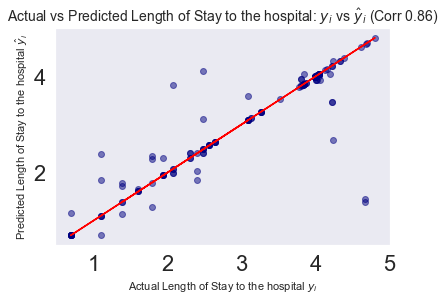

In [157]:
corr=round(dataPred['Actual'].corr(dataPred['Predicted']),2)
plt.scatter(x=y_test,y=y_stregr,c='navy',alpha=0.5)
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual Length of Stay to the hospital $y _i$',fontsize=11)
plt.ylabel('Predicted Length of Stay to the hospital $\hat y _i$',fontsize=11)
plt.title(f'Actual vs Predicted Length of Stay to the hospital: $y _i$ vs $\hat y _i$ (Corr {corr})',fontsize=14)
plt.show()

In [158]:
#the model is very accurate; there’s a strong correlation (86%) between the model’s predictions and its actual results.

In [159]:
#!pip install yellowbrick

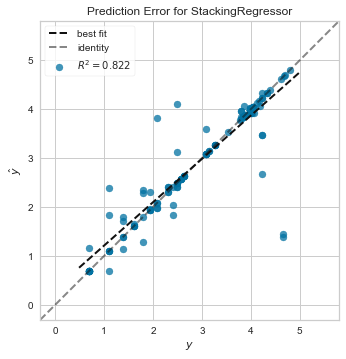

<AxesSubplot:title={'center':'Prediction Error for StackingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [160]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(stregr)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

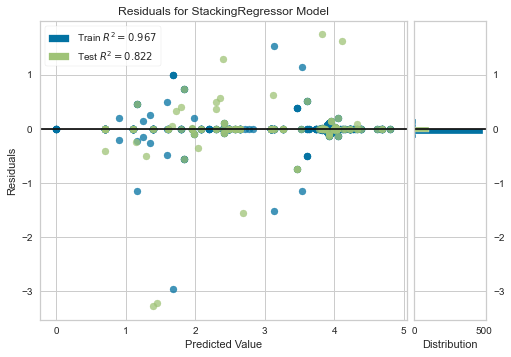

AttributeError: 'StackingRegressor' object has no attribute 'line_color'

In [161]:
from yellowbrick.regressor import residuals_plot
print(residuals_plot(stregr, X_train, y_train, X_test, y_test))

In [ ]:
#We can see from the above plot that r2 score for train set is less than
#r2 for test set regarding to their residuals

# 6. Export the Stacked model

In [ ]:
import joblib
#On sauvegarde notre modele (extra trees) dans le chemin ci-apres:
joblib.dump(stregr,
            r'C:\Users\user\Dropbox\KCA\PaperProjects\StackedRegressorPatientDischarge\stackedReg.ml')

# 7. Visualisation

In [ ]:
#Distribution of LOS for patients for four services:
#Pedia, Neon, Hospitalisation and Gynecology.
dataFinalTest=dataFinal[['Service','LOS','Age', 'Gender']].copy()
dataFinalTest

In [ ]:
dataFinalTest['Service']=np.expm1(dataFinalTest['Service']).astype(int)
dataFinalTest['LOS']=np.expm1(dataFinalTest['LOS']).astype(int)
dataFinalTest['Age']=np.expm1(dataFinalTest['Age']).astype(float)
dataFinalTest['Gender']=np.expm1(dataFinalTest['Gender']).astype(int)
dataFinalTest

In [ ]:
dataFinalTest['Service']=dataFinalTest['Service'].map({0:'Pediatrics',
                                                       1:'Hospitalisation',
                                                       2:'Gynecology', 
                                                       3:'Neonatology'})

In [ ]:
sns.displot(
  data=dataFinalTest,
  x="LOS",
  kind="kde",
  hue="Service",
  height=6,
  aspect=1.4
)

In [ ]:
dataFinalTest.describe()

In [ ]:
labels = dataFinalTest.Service.value_counts().index
colors = ['lightblue','pink','beige','blue']
explode = [0,0,0,0]
sizes = dataFinalTest.Service.value_counts().values


plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=[0.04,0.04,0.05,0.05], labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
# plot.pie(explode=,autopct='%1.1f%%',ax=ax[0],)
plt.title('Service',color = 'Brown',fontsize = 15)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(dataFinalTest.LOS,dataFinalTest.Age,hue=dataFinalTest.Service)
plt.ioff()